# SUPERSTORE PROJECT- ESTHER REGINALD YEBOAH

# Mid-Course Project



### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit. 

Before the management team of the company can take any actionable decision with regards to the campaign,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given  data and advise management on what to do to increase sales and profit as intended in the compaign.

Kindly  outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.


Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.

**Use Powerpoint or any other presentation application for your presentation.**

Good Luck !








## DATA PREPARATION

In [1]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


In [2]:
#Reading the data
#NB: Make sure you the data in your current working directory

data = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

In [3]:
#checking the data in each column
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [4]:
data.tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51280,50234,TZ-2014-8220,2014-12-31,2015-06-01,Standard Class,CK-2325,Christine Kargatis,Home Office,Dar es Salaam,Dar Es Salaam,Tanzania,NaN,Africa,Africa,OFF-HAR-10001531,Office Supplies,Labels,"Harbour Creations Removable Labels, Adjustable",49.500,6,0.0,6.8400,2.15,Medium
51281,32594,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.0,US,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,2.06,Medium
51282,47543,UP-2014-4410,2014-12-31,2015-04-01,Standard Class,GT-4755,Guy Thornton,Consumer,Zaporizhzhya,Zaporizhzhya,Ukraine,NaN,EMEA,EMEA,OFF-AVE-10003558,Office Supplies,Labels,"Avery Round Labels, Alphabetical",27.840,4,0.0,6.1200,1.70,Medium
51283,27700,IN-2014-23754,2014-12-31,2015-07-01,Standard Class,KM-16225,Kalyca Meade,Corporate,Shantou,Guangdong,China,NaN,APAC,North Asia,OFF-PA-10004727,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.470,3,0.0,25.3800,1.41,Medium
51284,2143,MX-2014-108574,2014-12-31,2015-04-01,Standard Class,JB-16045,Julia Barnett,Home Office,Reynosa,Tamaulipas,Mexico,NaN,LATAM,North,OFF-LA-10004969,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.740,3,0.0,0.6600,1.32,Medium
51285,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.0,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,NaN,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,2014-12-31,2015-04-01,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,United States,80538.0,US,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


In [5]:
#the columns we have available
for col in data.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


In [6]:
#infoormation about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [7]:
#inspect data
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [8]:
#checking for unigue categoriesin each categorical columns
category_col= data[['Market','Region','Category','Sub-Category','Product Name','Order Priority','Segment']]

for u in category_col:
    print((u)+'-'+ (data[u].unique()))

['Market-Africa' 'Market-APAC' 'Market-EMEA' 'Market-EU' 'Market-US'
 'Market-LATAM' 'Market-Canada']
['Region-Africa' 'Region-Oceania' 'Region-EMEA' 'Region-North'
 'Region-Central Asia' 'Region-West' 'Region-North Asia' 'Region-Central'
 'Region-South' 'Region-Canada' 'Region-Southeast Asia' 'Region-East'
 'Region-Caribbean']
['Category-Office Supplies' 'Category-Furniture' 'Category-Technology']
['Sub-Category-Storage' 'Sub-Category-Supplies' 'Sub-Category-Paper'
 'Sub-Category-Furnishings' 'Sub-Category-Copiers'
 'Sub-Category-Bookcases' 'Sub-Category-Appliances' 'Sub-Category-Art'
 'Sub-Category-Accessories' 'Sub-Category-Binders' 'Sub-Category-Labels'
 'Sub-Category-Envelopes' 'Sub-Category-Chairs' 'Sub-Category-Machines'
 'Sub-Category-Tables' 'Sub-Category-Phones' 'Sub-Category-Fasteners']
['Product Name-Tenex Lockers, Blue'
 'Product Name-Acme Trimmer, High Speed'
 'Product Name-Tenex Box, Single Width' ...
 'Product Name-Park Ridge Embossed Executive Business Envelopes'
 'Pro

In [9]:
#checking for missing data
data.isnull().sum()


Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [10]:
#checking for duplicates
data.duplicated().sum()

0

In [11]:
postmissing_percent= (data['Postal Code'].isnull().sum()/data['Country'].count()) * 100
#postmissing_percent= 80.51472021836615
#we are forced to drop postal code column as more than 80 percent of the data are missing.
superstore= data.drop('Postal Code', axis= 1)
superstore.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [12]:
#inspect data
superstore.describe()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


### Adding few columns to enhance analysis.
<p> -Unit price( Metric is sales/ quantity)
<p> -Interval between order date and shipping date in days
<p> -Cost of an item( Metric is Sales-Profit)
<p> -Extracting year and month
<p> -we need to convert the discuount present in our data to actual values as they are represented with percentages (Metric-Price * discount)

In [13]:
superstore['Price']= superstore['Sales']/superstore['Quantity']
superstore['Fulfilment_days']= superstore['Ship Date']-superstore['Order Date']
superstore['Unit Profit']=superstore['Profit']/superstore['Quantity']
superstore['Cost']=superstore['Price']-superstore['Unit Profit']
superstore.insert(4,'Month',superstore['Order Date'].dt.month_name())
superstore.insert(3,'Year',superstore['Order Date'].dt.year)
superstore['Disc_actualvalue']=superstore['Price']*superstore['Discount']

superstore.head()

,Row ID,Order ID,Order Date,Year,Ship Date,Month,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Price,Fulfilment_days,Unit Profit,Cost,Disc_actualvalue
0,42433,AG-2011-2040,2011-01-01,2011,2011-06-01,January,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.150,151 days,53.070,151.08,0.0000
1,22253,IN-2011-47883,2011-01-01,2011,2011-08-01,January,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,40.122,212 days,12.012,28.11,4.0122
2,48883,HU-2011-1220,2011-01-01,2011,2011-05-01,January,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.530,120 days,7.410,9.12,0.0000
3,11731,IT-2011-3647632,2011-01-01,2011,2011-05-01,January,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,14.955,120 days,-8.685,23.64,7.4775
4,22255,IN-2011-47883,2011-01-01,2011,2011-08-01,January,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,22.734,212 days,7.554,15.18,2.2734


## DATA ANALYSIS
Before we can suggest what should work, let's find out what's existing(working or not working). We will take a look at three aspect in this data to help us make a less generic conclusion and give a more particular advice; Profit Margin, Product & Market.


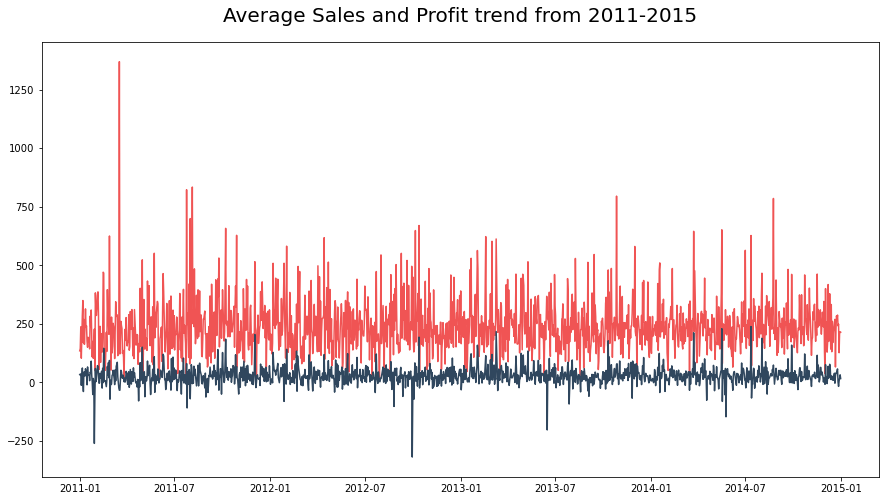

In [14]:
#how sales and profit had been overtime
snp_trend = superstore[['Order Date','Sales','Profit']].sort_values('Order Date') # Chronological Ordering

snp_trend = snp_trend.groupby('Order Date').mean() # Groupby to get the average Sales and Profit on each day

# Visualizing the Line Chart
plt.figure(figsize=[15,8])
Avg_snp=plt.plot(snp_trend.index, 'Sales', data=snp_trend, color='#F05454') # Avg Sales over Time
plt.plot(snp_trend.index, 'Profit', data=snp_trend, color='#30475E') # Avg Profit over Time
plt.title("Average Sales and Profit trend from 2011-2015", size=20, pad=20)
plt.savefig('Average SnP.png')
plt.show()


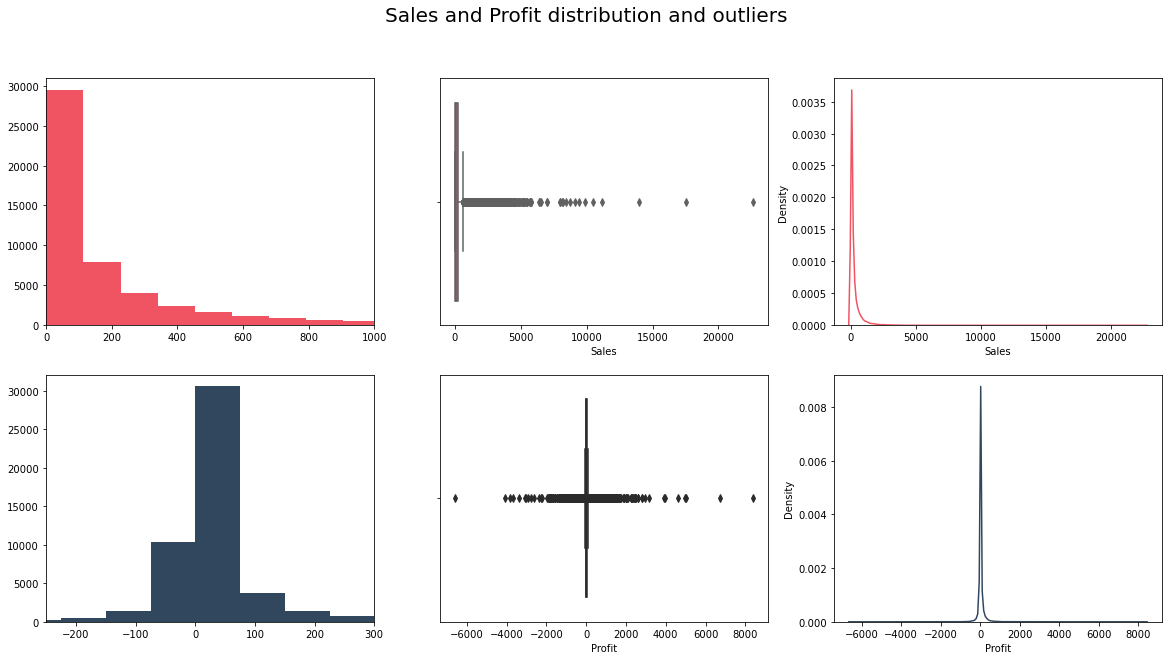

In [15]:
# general disribution to see the disparity between sales and profit
snp_distr =superstore[['Sales','Profit']]

# Visualizing the histograms
plt.figure(figsize=[20,10])

plt.suptitle("Sales and Profit distribution and outliers", size=20)

# Histogram for Sales
plt.subplot(2,3,1)
plt.hist(snp_distr['Sales'], bins=200, color='#F05462')
plt.xlim(0,1000)

# Boxplot of  for Sales
plt.subplot(2,3,2)
sns.boxplot(snp_distr['Sales'], color='#F05463')

# KDEPlot for Sales
plt.subplot(2,3,3)
sns.kdeplot(x=snp_distr['Sales'], color='#F05462')




# Histogram for Profit
plt.subplot(2,3,4)
plt.hist(snp_distr['Profit'], bins=200, color='#30475E')
plt.xlim(-250,300)

# Boxplot of  for Profit
plt.subplot(2,3,5)
sns.boxplot(snp_distr['Profit'], color='#30475E')

# KDEPlot for Sales
plt.subplot(2,3,6)
sns.kdeplot(x=snp_distr['Profit'], color='#30475E')

plt.show()

In [16]:
totals= pd.pivot_table(data=superstore,index=['Category'], columns=['Market'], values=['Sales','Cost','Disc_actualvalue'], aggfunc='sum',margins= True, margins_name='Grand Total')
totals


Cost                                             \
Market                APAC     Africa    Canada       EMEA         EU   
Category                                                                
Furniture        330220.38   81581.31   4144.14   97050.36  191776.32   
Office Supplies  202412.67  106296.45  10417.11  118121.85  233125.41   
Technology       307657.89  125362.65   8953.53  125116.11  257774.85   
Grand Total      840290.94  313240.41  23514.78  340288.32  682676.58   

                                                      Disc_actualvalue  \
Market               LATAM           US   Grand Total             APAC   
Category                                                                 
Furniture        210121.34  188596.0827  1.103490e+06     44198.711718   
Office Supplies  130832.22  158703.8507  9.599096e+05     26939.008302   
Technology       186852.00  183583.3166  1.195300e+06     34367.436993   
Grand Total      527805.56  530883.2500  3.258700e+06    105505.157013   

                                                                            \
Market               Africa Canada        EMEA            EU         LATAM   
Category                                                                     
Furniture         5251.5414    0.0  10180.1871  27100.351875  34827.036200   
Office Supplies   6253.9191    0.0  12405.0816  22265.290500  11711.145200   
Technology        7730.6337    0.0  11808.6939  26699.980650  15315.430304   
Grand Total      19236.0942    0.0  34393.9626  76065.623025  61853.611704   

                                                     Sales              \
Market                     US    Grand Total          APAC      Africa   
Category                                                                 
Furniture        32844.541547  154402.369840  1.343934e+06  194650.635   
Office Supplies  20073.624600   99648.069302  8.843198e+05  266755.533   
Technology       32510.007400  128432.182947  1.357490e+06  322367.043   
Grand Total      85428.173547  382482.622089  3.585744e+06  783773.211   

                                                                   \
Market             Canada        EMEA            EU         LATAM   
Category                                                            
Furniture        10595.28  228620.736  7.791030e+05  8.119706e+05   
Office Supplies  30034.08  276685.992  1.046307e+06  5.639207e+05   
Technology       26298.81  300854.583  1.112679e+06  7.887138e+05   
Grand Total      66928.17  806161.311  2.938089e+06  2.164605e+06   

                                             
Market                     US   Grand Total  
Category                                     
Furniture        7.419998e+05  4.110874e+06  
Office Supplies  7.190470e+05  3.787070e+06  
Technology       8.361540e+05  4.744557e+06  
Grand Total      2.297201e+06  1.264250e+07

In [17]:
# are we at loss
loss_profit=totals['Sales','Grand Total']-totals['Cost','Grand Total']- totals['Disc_actualvalue','Grand Total']
loss_profit # No we are not.Total Sales= 1.264250e+07

Category
Furniture          2.852982e+06
Office Supplies    2.727513e+06
Technology         3.420825e+06
Grand Total        9.001319e+06
dtype: float64

### PROFIT MARGIN ANALYSIS

In [18]:
#first, i'll like to see if there is a correlation between Quantity and Profit,
#Is it trully the case that the more people buy, the more profit made or rather there are some highly profitable items being sold that generates most of the profit.

quan_prof= np.corrcoef(superstore['Quantity'],superstore['Profit'])
quan_prof



array([[1.        , 0.10436503],
       [0.10436503, 1.        ]])

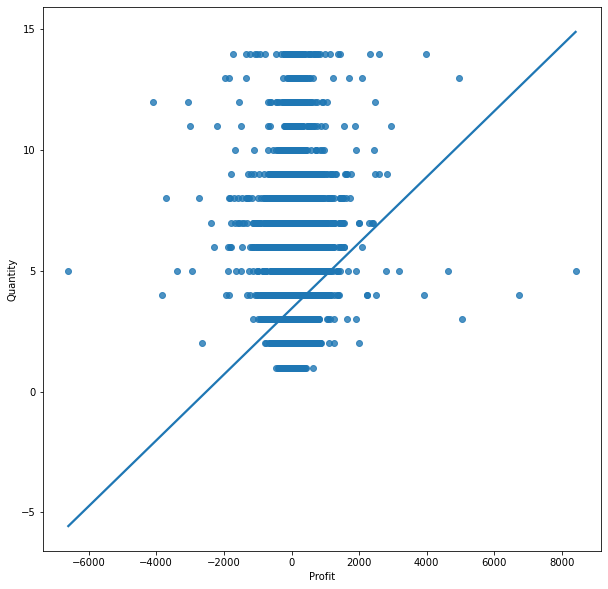

<AxesSubplot:xlabel='Profit', ylabel='Quantity'>

In [19]:
# let's visualize this better
plt.figure(figsize=[10,10])

quan_profplot= sns.regplot(x='Profit',y='Quantity', data= superstore, ci= None)
plt.show()
quan_profplot

This correlation is positive but very low. The case could likely be that some particular goods have a better profit margin than the others. Let's calculate the profit margin.
Considering that the general rule for profit margin should be between 10 %- 20%

In [20]:
superstore['Profit_Margin']=superstore['Unit Profit']/(superstore['Price']-superstore['Disc_actualvalue'])* 100
superstore.head()
#superstore.to_csv('superstore.csv')

,Row ID,Order ID,Order Date,Year,Ship Date,Month,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Price,Fulfilment_days,Unit Profit,Cost,Disc_actualvalue,Profit_Margin
0,42433,AG-2011-2040,2011-01-01,2011,2011-06-01,January,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.150,151 days,53.070,151.08,0.0000,25.995591
1,22253,IN-2011-47883,2011-01-01,2011,2011-08-01,January,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,40.122,212 days,12.012,28.11,4.0122,33.265208
2,48883,HU-2011-1220,2011-01-01,2011,2011-05-01,January,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.530,120 days,7.410,9.12,0.0000,44.827586
3,11731,IT-2011-3647632,2011-01-01,2011,2011-05-01,January,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,14.955,120 days,-8.685,23.64,7.4775,-116.148445
4,22255,IN-2011-47883,2011-01-01,2011,2011-08-01,January,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,22.734,212 days,7.554,15.18,2.2734,36.919738


In [21]:
#how much of the items that has been sold for these past years have been sold below profit margin as low as 10%
lowprofitpercent= ((superstore['Profit_Margin'] < 10).sum()/ superstore['Profit'].count()) * 100

lowprofitpercent



38.93156560733087

### **38.93156560733087** of the items sold in our data was below a general average adviced profit margin.
<p> This could have been caused by a lot of factors,from low patronage, obsolete items, hyper-competitive industry, cost of goods, high discounts etc.
    
#### These factors should be fished out and them we can **increase our profit margin** to make more profit 


## MARKET ANALYSIS 

In [22]:
#let's take a look at sales and profit per market
snp_permarket= superstore.groupby(['Market','Category'], as_index=False)[['Sales','Profit']]. mean().sort_values(by='Profit', ascending= False)
snp_permarket

,Market,Category,Sales,Profit
8,Canada,Technology,404.597077,111.486462
2,APAC,Technology,566.565203,85.389756
20,US,Technology,452.709276,78.752002
14,EU,Technology,582.554444,75.535423
6,Canada,Furniture,252.268571,62.220000
0,APAC,Furniture,553.286978,51.830445
17,LATAM,Technology,384.738446,49.066690
5,Africa,Technology,353.860640,48.440717
12,EU,Furniture,519.055996,45.869513
7,Canada,Office Supplies,108.426282,28.727545


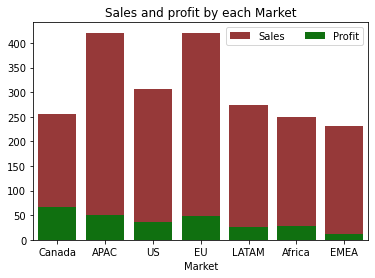

In [23]:
snp_permarketplot=sns.barplot(x='Market', y='Sales', data=snp_permarket, label="Sales", color="brown", ci= None)
sns.barplot(x='Market', y='Profit', data=snp_permarket, label="Profit", color="green",ci=None)
plt.ylabel('')
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.title('Sales and profit by each Market')
plt.show() #sns.catplot(x='Market',y='Profit',data= snp_permarket, kind='bar',hue= 'Sales', ci=None)
#sns.catplot(x='Market',y='Sales',data= snp_permarket, kind='bar', ci=None)
fig=snp_permarketplot.get_figure()
fig.savefig('snp_permarketplot.png', dpi=100)
plt.show()



Although, APAC market is leading in sales, Canada is however leading in profit. Let's get a quick idea of the product categories and Product Names that is prevailing in Canada.Also EMEA is the least performing Market in terms of Profit and Sales. We will later take a look at what product category then currently deal with.

<Figure size 720x720 with 0 Axes>

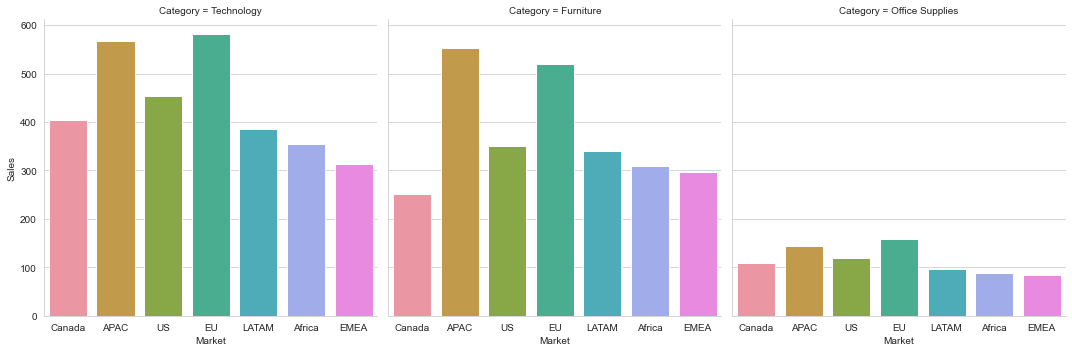

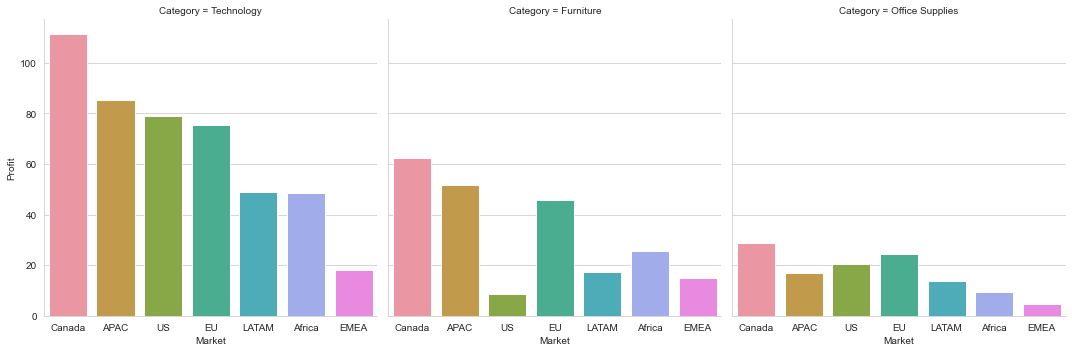

In [24]:
#sales and profit per market in categories
plt.figure(figsize=[10,10])
sns.set_style("whitegrid")
sns.set_palette("RdBu")
snp_permarketplot=sns.catplot(x='Market', y='Sales',data= snp_permarket, kind='bar',col= 'Category' )
sns.catplot(x='Market', y='Profit',data= snp_permarket, kind='bar',col='Category' )
plt.savefig('snp_permarketplot',dpi=100)
plt.show()
snp_permarketplot

<Figure size 720x1008 with 0 Axes>

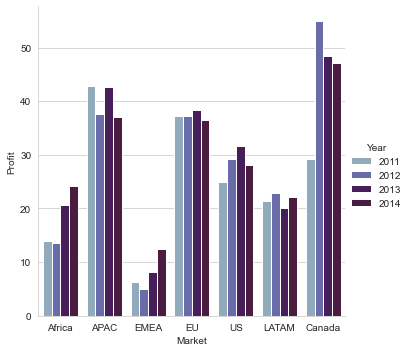

In [25]:
#market profit by years
plt.figure(figsize=[10,14])
sns.set_palette('twilight')

marketby_year= sns.catplot( x= 'Market',y= 'Profit', data= superstore, kind= 'bar', hue= 'Year', ci= None)
plt.savefig('marketby_year.png',dpi=100)
plt.show()

<Figure size 720x1008 with 0 Axes>

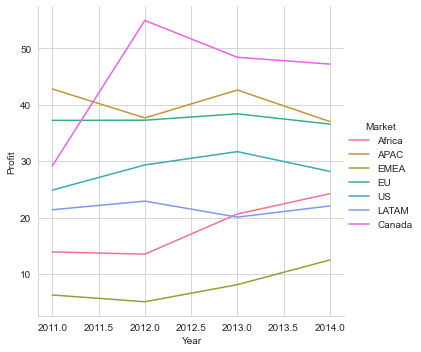

In [26]:
#yet another view
plt.figure(figsize=[10,14])
sns.set_palette('twilight')

marketby_year= sns.relplot( x= 'Year',y= 'Profit', data= superstore, kind= 'line', hue= 'Market', ci= None)
plt.savefig('marketby_year.png',dpi=100)
plt.show()

<Figure size 1440x1440 with 0 Axes>

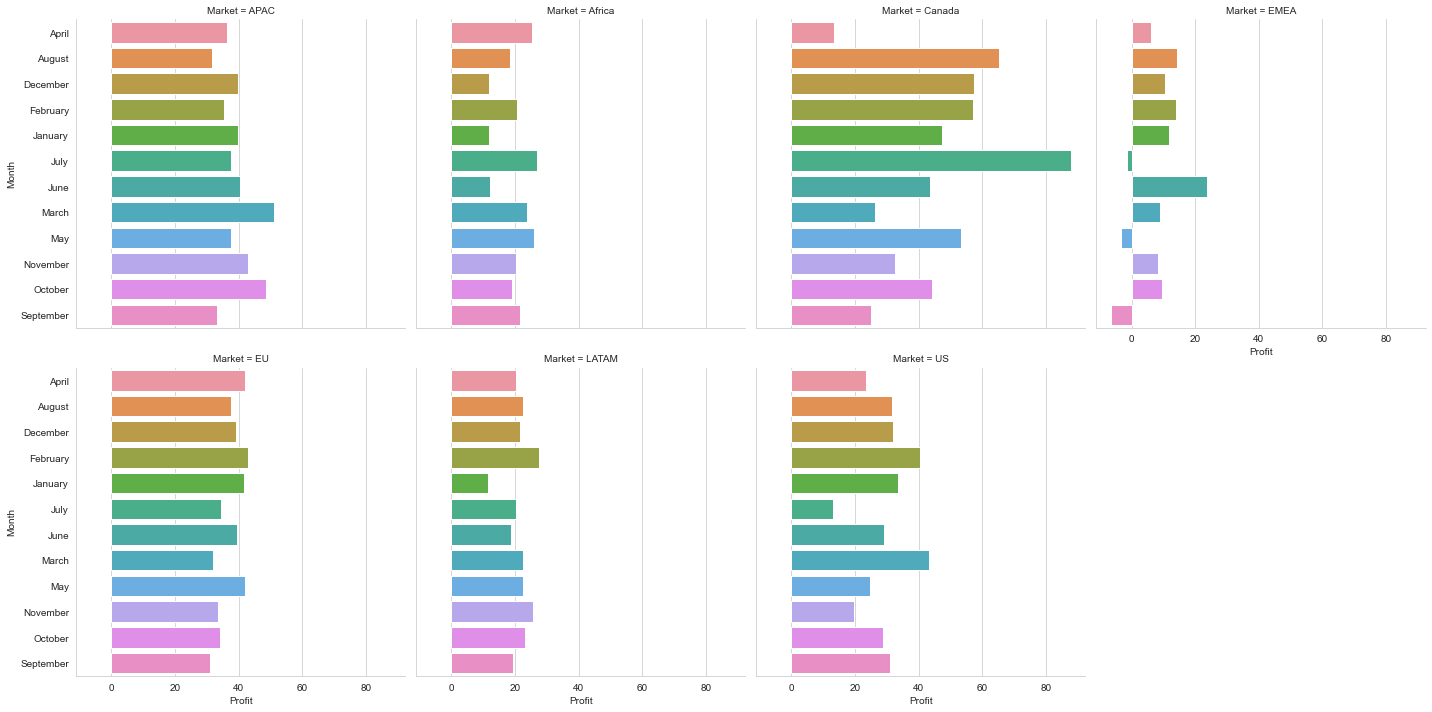

In [27]:
#most profitable months in each markets
plt.figure(figsize=[20,20])
monthby_Profit= superstore.groupby(['Month', 'Market'],as_index= False)['Profit'] .mean().sort_values(by='Month', ascending= True)
monthby_Profit
#monthby_Profitplot= plt.barh(monthby_Profit['Month'],monthby_Profit['Profit'],color=['#30475E','#800080','#809880'])
monthby_Profitplot= sns.catplot(x='Profit',y='Month',data=monthby_Profit,kind= 'bar',col='Market',col_wrap=4)
plt.show()
monthby_Profitplot
#plt.xticks(rotation=45)


In [28]:
#the best and worst performing Sub-category
superstorebest=superstore.groupby(['Category','Sub-Category'], as_index=False)[['Profit']].mean().sort_values(by='Profit',ascending=False)
superstorebest

,Category,Sub-Category,Profit
14,Technology,Copiers,116.314687
4,Office Supplies,Appliances,80.729681
0,Furniture,Bookcases,67.160688
16,Technology,Phones,64.556749
13,Technology,Accessories,42.154896
1,Furniture,Chairs,40.884178
15,Technology,Machines,39.614989
11,Office Supplies,Storage,21.439314
10,Office Supplies,Paper,16.734789
2,Furniture,Furnishings,14.816223


In [29]:
Canadaprod= superstore[superstore['Market']=='Canada']
prod_canada=Canadaprod.groupby(['Category','Sub-Category'])[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False)
prod_canada

Profit       Sales
Category        Sub-Category                        
Technology      Copiers       204.895385  574.271538
Furniture       Tables        150.090000  424.680000
Office Supplies Appliances    139.623750  496.276875
Technology      Phones        133.993500  504.280500
Furniture       Bookcases     103.271538  441.078462
                Chairs         71.395000  266.947500
Technology      Accessories    68.174211  235.432105
Office Supplies Storage        58.248600  211.746000
Technology      Machines       46.753846  328.804615
Office Supplies Paper          21.991765   89.384118
                Supplies       17.475882   77.032941
                Envelopes      17.118000   56.718000
                Art            14.731452   66.444194
                Binders        12.680323   49.828065
                Fasteners       7.785000   26.636667
Furniture       Furnishings     7.586000   53.902000
Office Supplies Labels          5.173200   16.869600

Technology category is at the forefront of the Canada market and 'Motorola Smart Phone, Full Size' happens to be their best seller.Let's see if this is the same in all the Market.

Yes, Technology is leading and we can confidently say generates most revenue.
Earlier, we noted how EMEA is the least performing market both in Sales and Profit. We will now see what each product categories generate and the probable cause of their low performance.

In [30]:
emea_prod= superstore[superstore['Market']=='EMEA']
cat_emea=emea_prod.groupby(['Category','Sub-Category'])[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False #/True
                                                                                               )
cat_emea.head(20)

Profit       Sales
Category        Sub-Category                       
Furniture       Tables        61.427800  874.087133
Technology      Copiers       43.043732  421.791679
Furniture       Bookcases     35.757865  413.229351
Office Supplies Appliances    19.636675  443.312844
Technology      Accessories   14.930762  184.017262
                Machines      11.568886  261.727494
                Phones        10.138729  388.205441
Furniture       Furnishings    5.696478  109.618020
Office Supplies Storage        5.369393  152.697714
                Supplies       4.429173   62.894507
                Paper          4.307476   49.765340
                Binders        4.186675   38.370099
                Fasteners      4.038846   27.141667
                Envelopes      3.510117   45.798818
                Art            2.086754   54.794513
                Labels         1.835085   19.217761
Furniture       Chairs        -2.438280  279.266160

In [31]:
emea_prod= superstore[superstore['Market']=='EMEA']
cat_emea=emea_prod.groupby(['Category','Sub-Category'])[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False #/True
                                                                                               )
cat_emea.head(20)

Profit       Sales
Category        Sub-Category                       
Furniture       Tables        61.427800  874.087133
Technology      Copiers       43.043732  421.791679
Furniture       Bookcases     35.757865  413.229351
Office Supplies Appliances    19.636675  443.312844
Technology      Accessories   14.930762  184.017262
                Machines      11.568886  261.727494
                Phones        10.138729  388.205441
Furniture       Furnishings    5.696478  109.618020
Office Supplies Storage        5.369393  152.697714
                Supplies       4.429173   62.894507
                Paper          4.307476   49.765340
                Binders        4.186675   38.370099
                Fasteners      4.038846   27.141667
                Envelopes      3.510117   45.798818
                Art            2.086754   54.794513
                Labels         1.835085   19.217761
Furniture       Chairs        -2.438280  279.266160

In [32]:
APAC_prod= superstore[superstore['Market']=='APAC']
cat_APAC=APAC_prod.groupby(['Category','Sub-Category'])[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False #/True
                                                                                               )
cat_APAC.head(20)

Profit        Sales
Category        Sub-Category                         
Office Supplies Appliances    124.641151   910.120500
Technology      Copiers       124.009272   758.579256
                Phones        118.017498   705.884610
Furniture       Bookcases     108.423892   809.011344
Technology      Machines       74.557978   534.569719
Furniture       Chairs         64.059823   528.294746
Office Supplies Storage        30.249598   264.151298
Furniture       Furnishings    25.064034   156.648034
Technology      Accessories    22.722624   266.430951
Office Supplies Binders        11.189254    65.831129
                Art            10.986138    94.323473
                Paper          10.135176    88.348937
                Envelopes       8.384861    83.647349
                Supplies        5.978566   100.922692
                Labels          3.473014    31.221042
                Fasteners       2.533819    42.442882
Furniture       Tables       -106.501313  1190.999005

In [33]:
eu_prod= superstore[superstore['Market']=='EU']
cat_eu=eu_prod.groupby(['Category','Sub-Category'])[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False #/True
                                                                                               )
cat_eu.head(20)

Profit        Sales
Category        Sub-Category                         
Office Supplies Appliances    148.517413   882.817894
Technology      Copiers       120.859471   785.222826
Furniture       Bookcases     116.543944   751.086155
Technology      Accessories    73.985715   360.781998
                Phones         65.516442   633.880758
Furniture       Chairs         42.562510   492.432187
Technology      Machines       40.867823   527.576546
Furniture       Furnishings    29.608952   176.171382
Office Supplies Supplies       21.678182   118.880074
                Art            21.473992   111.637506
                Storage        21.319540   259.103178
                Paper          20.053185    95.825871
                Envelopes      19.592905    90.984265
                Binders        15.003964    75.749954
                Fasteners      10.225406    46.952335
                Labels          7.244326    34.459612
Furniture       Tables       -230.751907  1158.037104

In [34]:
us_prod= superstore[superstore['Market']=='US']
cat_us=us_prod.groupby(['Category','Sub-Category'])[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False #/True
                                                                                               )
cat_us.head(20)

Profit        Sales
Category        Sub-Category                         
Technology      Copiers       817.909190  2198.941618
                Accessories    54.111788   215.974604
                Phones         50.073938   371.211534
Furniture       Chairs         43.095894   532.332420
Office Supplies Appliances     38.922758   230.755710
Technology      Machines       29.432669  1645.553313
Office Supplies Envelopes      27.418019    64.867724
                Storage        25.152277   264.590553
                Paper          24.856620    57.284092
                Binders        19.843574   133.560560
                Labels         15.236962    34.303055
Furniture       Furnishings    13.645918    95.825668
Office Supplies Art             8.200737    34.068834
                Fasteners       4.375660    13.936774
                Supplies       -6.258418   245.650200
Furniture       Bookcases     -15.230509   503.859633
                Tables        -55.565771   648.794771

In [35]:
latam_prod= superstore[superstore['Market']=='LATAM']
cat_latam=latam_prod.groupby(['Category','Sub-Category'])[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False #/True
                                                                                               )
cat_latam.head(20)

Profit       Sales
Category        Sub-Category                       
Office Supplies Appliances    80.954019  563.700458
Technology      Copiers       65.255076  502.897175
                Phones        48.053325  461.324025
                Accessories   41.045802  215.408143
Furniture       Bookcases     38.645193  469.588702
                Chairs        30.749137  322.883774
Office Supplies Storage       20.210150  177.102469
Technology      Machines      17.449230  303.269970
Office Supplies Supplies      12.350519   70.536000
                Art           11.432066   67.737822
                Paper          9.782119   61.498222
                Envelopes      9.348811   61.634653
                Binders        5.435112   44.109959
                Fasteners      3.993060   30.196656
                Labels         3.898582   22.148157
Furniture       Furnishings    0.376372  100.089673
                Tables       -69.134000  813.934427

In [36]:
africa_prod= superstore[superstore['Market']=='Africa']
cat_africa=africa_prod.groupby(['Category','Sub-Category'])[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False #/True
                                                                                               )
cat_africa.head(20)

Profit       Sales
Category        Sub-Category                        
Furniture       Tables        108.396892  933.313378
Technology      Copiers        68.003068  467.270301
                Phones         66.520917  431.702459
Furniture       Bookcases      36.555704  425.803102
Technology      Machines       28.734855  333.837754
                Accessories    27.923198  181.776259
Office Supplies Appliances     25.138808  425.934082
                Storage        20.229346  164.132623
Furniture       Chairs         15.213574  306.220623
                Furnishings    10.708828   95.917479
Office Supplies Paper          10.162596   66.499936
                Envelopes       7.403078   47.258444
                Art             6.425288   62.093365
                Supplies        4.592681   58.687726
                Binders         4.344402   36.459059
                Fasteners       3.847284   26.194581
                Labels          3.524637   21.884368

  ### There are various types of product that earns most profit in each market.
  Advice, These sub-categories should be focused on during during distribution of goods to each markets.More profit can be generated when each market focus on their niche than just getting a regular distribution.It can also go deeper into cutting out products that earns below average profit in each market. 

## DISCOUNT ANALYSIS

In [37]:
#Let's see the effect of the discount on sales and profit
#-1 indicates a perfectly negative linear correlation between two variables
# 0 indicates no linear correlation between two variables
# 1 indicates a perfectly positive linear correlation between two variables
disc_corr_sales= np.corrcoef(superstore['Disc_actualvalue'],superstore['Sales'])
disc_corr_sales


array([[1.        , 0.39769395],
       [0.39769395, 1.        ]])

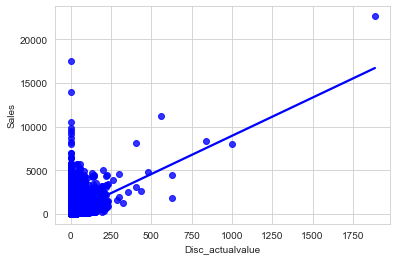

In [46]:
disc_corr_salesplot= sns.regplot(x='Disc_actualvalue',y='Sales', data= superstore, ci= None,color='b' )
plt.savefig('disc_corr_salesplot.png',dpi=100)
plt.show()

In [39]:
#there appears to be a positive correlation between sales and discount , although no so strong, is it the same with profit?

disc_corr_profit= np.corrcoef(superstore['Disc_actualvalue'],superstore['Profit'])

disc_corr_profit

array([[ 1.        , -0.29931787],
       [-0.29931787,  1.        ]])

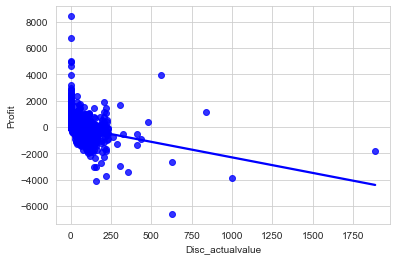

In [45]:
disc_corr_profitplot= sns.regplot(x='Disc_actualvalue',y='Profit', data= superstore, ci= None,color='b' )
plt.savefig('disc_corr_profitplot.png',dpi=100)
plt.show()

Inference: 
   <p> There is a negative correlation between profit and discount which in effect means the discount has a negative effect on the profit and causing the company to loose. **We may have to take actions in regulate and reviewing how much and when do give discount**.
    Areas we make look at includes, giving discount to ONLY goods that are under purchased, to the segment that patronizes more and a market with lower profit power may give more discount than others.
  <p>  Contrary to Profit, There is a positive although not strong correllation among these variables. This case may likely be that some part of the sales may be responsible for this spike.

In [41]:
disc_corr_quant= np.corrcoef(superstore['Disc_actualvalue'],superstore['Quantity'])
disc_corr_quant

array([[1.        , 0.00642952],
       [0.00642952, 1.        ]])

<AxesSubplot:xlabel='Disc_actualvalue', ylabel='Quantity'>

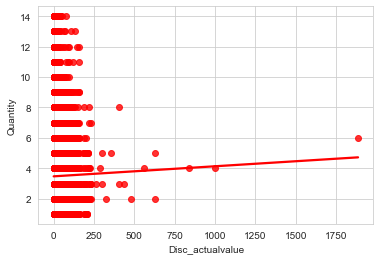

In [44]:
disc_corr_quantplot= sns.regplot(x='Disc_actualvalue',y='Quantity', data= superstore, ci= None, color='r' )
disc_corr_quantplot

###  SEGMENT ANALYSIS

In [43]:
#what segment generates more profit
segmentprof=superstore.groupby(['Segment'])[['Profit','Sales','Disc_actualvalue']].sum().sort_values(by='Profit',ascending=False #/True
                                                                                               )
segmentprof.head()

,Profit,Sales,Disc_actualvalue
Segment,,,
Consumer,749239.78206,6.507949e+06,198816.121505
Corporate,441208.32866,3.824698e+06,115522.702825
Home Office,277009.18056,2.309855e+06,68143.797759


From the look of the trend, each segment's performance in both sales is relative to their discount. Increasing Home office discount could increase there sales and profit.

## The End. Proceed to presentation